In [55]:
import cv2 
import argparse
import sys
import numpy as np
import os.path
import time
from matplotlib import pyplot
from matplotlib.pyplot import imshow
from matplotlib import pyplot
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
cd /content/drive/'My Drive'/doantask_10

/content/drive/My Drive/doantask_10


In [58]:
def load_yolo():
	net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
	classes = []
	with open("coco.names", "r") as f:
		classes = [line.strip() for line in f.readlines()]
	layers_names = net.getLayerNames()
	output_layers = [layers_names[i[0]-1] for i in net.getUnconnectedOutLayers()]
	colors = np.random.uniform(0, 255, size=(len(classes), 3))
	return net, classes, colors, output_layers

In [59]:
img_path="bike_cycle.jpg"

In [60]:
def load_image(img_path):
	# image loading
	img = cv2.imread(img_path)
	img = cv2.resize(img, None, fx=0.4, fy=0.4)
	height, width, channels = img.shape
	return img, height, width, channels

In [61]:
def detect_objects(img, net, outputLayers):			
	blob = cv2.dnn.blobFromImage(img, scalefactor=0.00392, size=(320, 320), mean=(0, 0, 0), swapRB=True, crop=False)
	net.setInput(blob)
	outputs = net.forward(outputLayers)
	return blob, outputs

In [62]:
def get_box_dimensions(outputs, height, width):
	boxes = []
	confs = []
	class_ids = []
	for output in outputs:
		for detect in output:
			scores = detect[5:]
			class_id = np.argmax(scores)
			conf = scores[class_id]
			if conf > 0.3:
				center_x = int(detect[0] * width)
				center_y = int(detect[1] * height)
				w = int(detect[2] * width)
				h = int(detect[3] * height)
				x = int(center_x - w/2)
				y = int(center_y - h / 2)
				boxes.append([x, y, w, h])
				confs.append(float(conf))
				class_ids.append(class_id)
	return boxes, confs, class_ids

In [63]:
def draw_labels(boxes, confs, colors, class_ids, classes, img): 
	indexes = cv2.dnn.NMSBoxes(boxes, confs, 0.5, 0.4)
	font = cv2.FONT_HERSHEY_PLAIN
	for i in range(len(boxes)):
		if i in indexes:
			x, y, w, h = boxes[i]
			label = str(classes[class_ids[i]])
			color = colors[i]
			cv2.rectangle(img, (x,y), (x+w, y+h), color, 2)
			cv2.putText(img, label, (x, y - 5), font, 1, color, 1)
  
	cv2_imshow(img)

In [64]:
def image_detect(img_path): 
	model, classes, colors, output_layers = load_yolo()
	image, height, width, channels = load_image(img_path)
	blob, outputs = detect_objects(image, model, output_layers)
	boxes, confs, class_ids = get_box_dimensions(outputs, height, width)
	draw_labels(boxes, confs, colors, class_ids, classes, image)
 

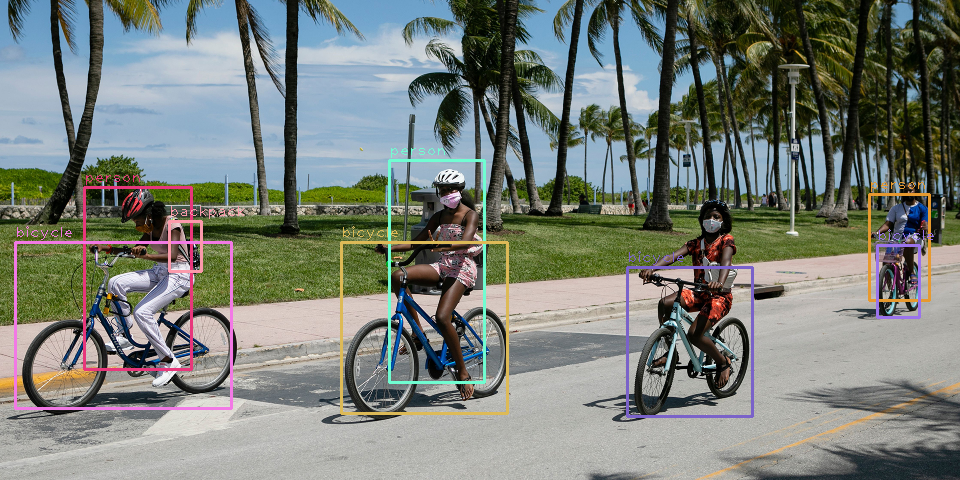

In [65]:
image_detect(img_path)